In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
vessel_features = pd.read_csv("./data/camcan/camcan_features_feb7.csv")
vessel_features["sub_id"] = vessel_features["sub_id"].apply(lambda x: x.split(".nii.gz")[0])


In [3]:
cortex_features = pd.read_csv("./data/camcan/cortical_thickness_data_age.csv")
cortex_features.drop("age", axis=1, inplace=True)

In [4]:
age_raw = pd.read_csv("./data/camcan/participant_data.csv")

In [5]:
cardio_raw = pd.read_csv("./data/camcan/cardio_measures_exported.csv")

In [6]:
mmse_raw = pd.read_csv("./data/camcan/mmse.tsv", sep="\t")

In [7]:
all = pd.merge(
        pd.merge(
            pd.merge(
               pd.merge(vessel_features, cortex_features, on="sub_id"),
                    mmse_raw, left_on="sub_id", right_on="CCID"),
                cardio_raw, left_on="sub_id", right_on="Observations"),
            age_raw, left_on="sub_id", right_on="subjectID")


In [8]:
rh = all.filter(like="rh_")
lh = all.filter(like="lh_")

In [9]:
cortex = pd.concat([rh, lh], axis=1)

In [10]:
vessels = all[[
    'num_branches', 'total_volume', 'bifurcations', 'endpoints',
    'mean_radius', 'max_radius', 'min_radius',
    'mean_tortuosity', 'max_tortuosity',
    'min_tortuosity', 'total_branch_length',
    'mean_branch_length', 'max_branch_length']]

In [11]:
age = all["age"]

In [12]:
cardio = all[["bp_dia_mean", "bp_sys_mean", "pulse_mean"]]

In [13]:
mmse = all["homeint_mmse_cal"]

In [14]:
import matplotlib.pyplot as plt

In [15]:
dia_high = all["bp_dia_mean"] > 90
sys_high = all["bp_sys_mean"] > 140

In [16]:
all["hypertension"] = (sys_high | dia_high).astype("float")
all["hypertension"].sum()

np.float64(75.0)

In [17]:
features_to_compare = [
 {'key':'num_branches', 'title':'Number of Branches', "position": "A"},
 {'key':'total_volume', 'title':'Total Volume ($mm^3$)', "position": "B"},
 {'key':'bifurcations', 'title':'Number of Bifurcations', "position": "C"},
 {'key':'endpoints', 'title':'Number of Endpoints', "position": "D"},
 {'key':'mean_radius', 'title':'Mean Radius (mm)', "position": "E"},
 {'key':'mean_tortuosity', 'title':'Mean Tortuosity', "position": "F"},
 {'key':'total_branch_length', 'title':'Total Branch Length (mm)', "position": "G"},
 {'key':'mean_branch_length', 'title':'Mean Branch Length (mm)', "position": "H"}]

In [18]:
def age_group(xx):
    # if xx < 30:
    #     return "<30"
    # elif xx < 40:
    #     return "30-40"
    if xx < 50:
        return 25
    elif xx < 60:
        return 55
    elif xx < 70:
        return 65
    elif xx < 80:
        return 75
    else:
        return 85

# def age_group(xx):
#     if xx < 60:
#         return "Younger than 60"
#     else:
#         return "60 or older"






plotting feature: num_branches
plotting feature: total_volume


/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/

plotting feature: bifurcations
plotting feature: endpoints
plotting feature: mean_radius


/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/

plotting feature: mean_tortuosity
plotting feature: total_branch_length
plotting feature: mean_branch_length


/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/arokem/miniforge3/envs/vessels/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/

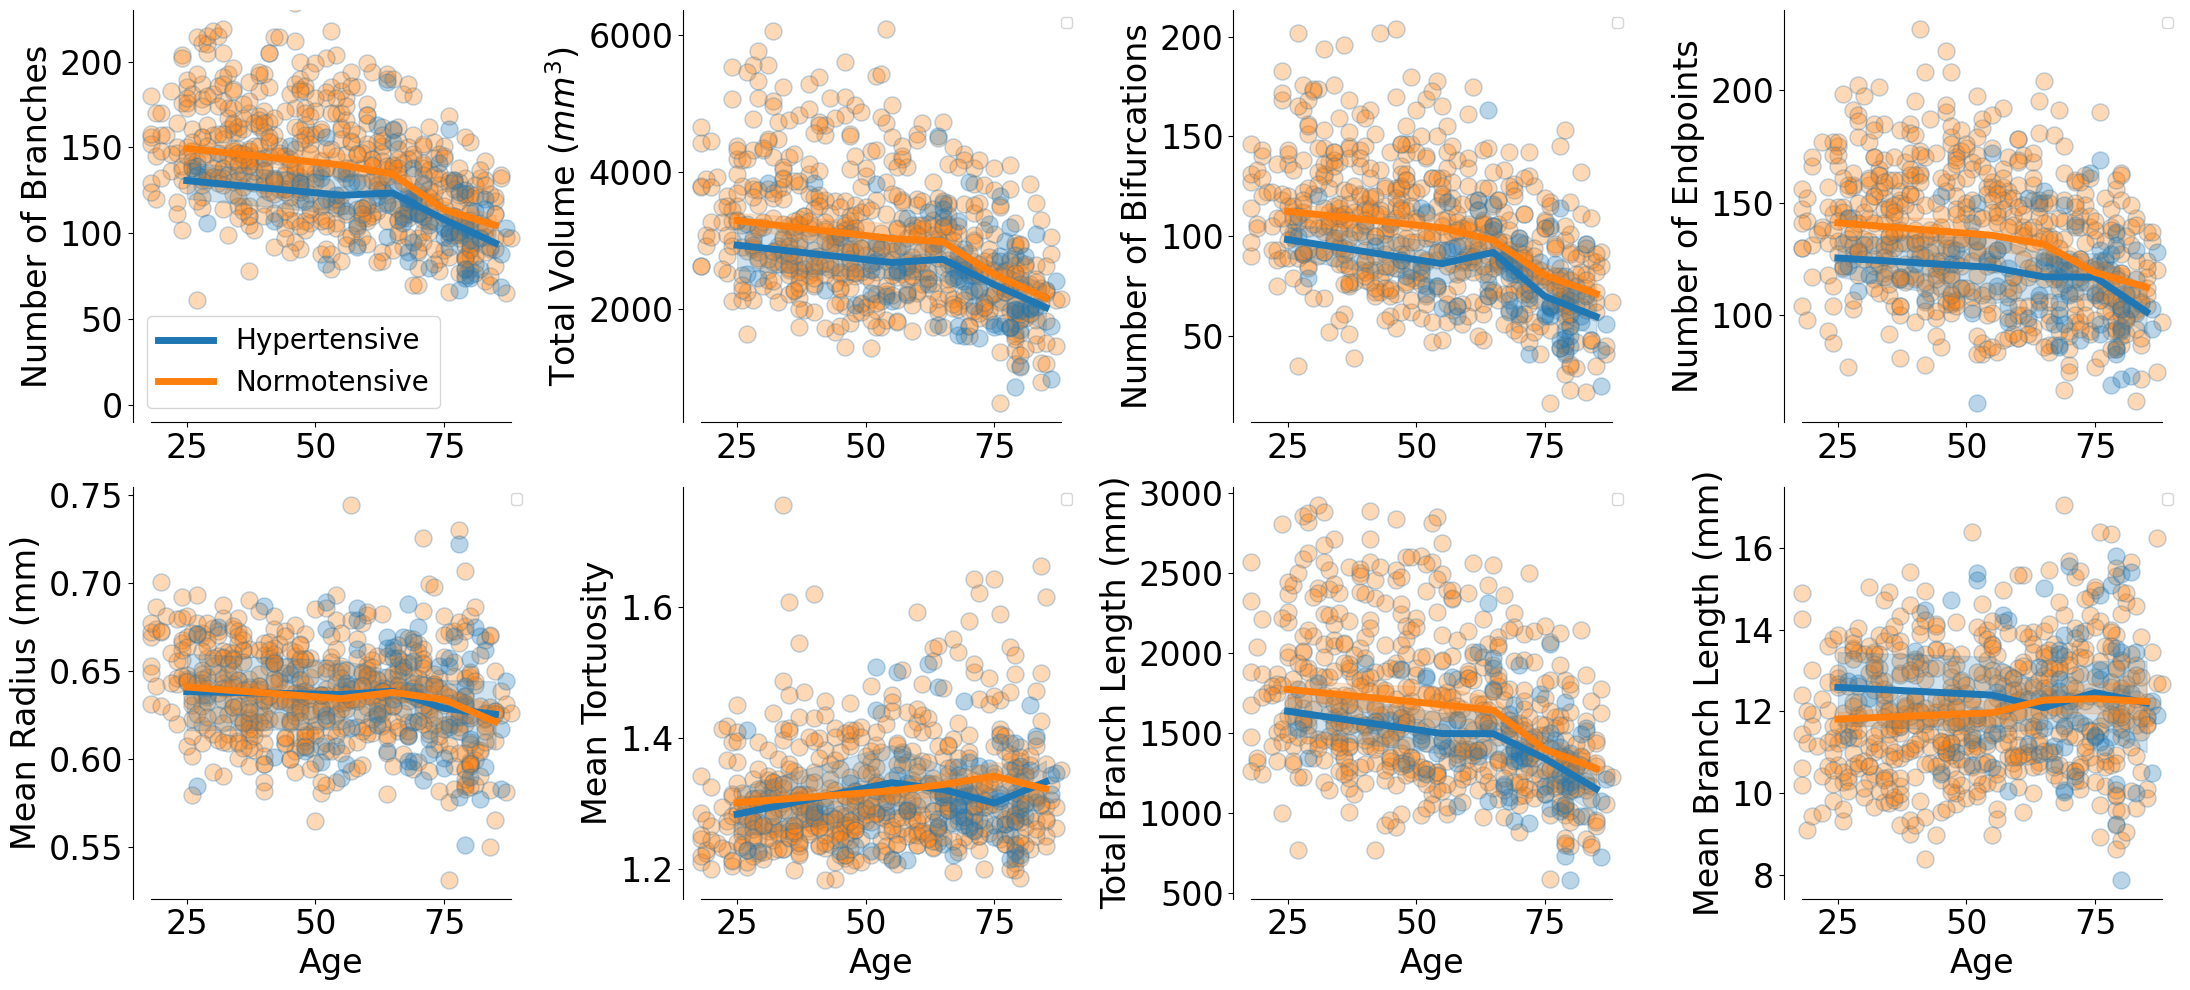

In [19]:
def plot_scatter(axs, x, y, c, title='', position="", set_xlabel=True, set_ylabel=True):
    axs.scatter(x[c==1], y[c==1], alpha=0.3, linewidths=1, edgecolors="C0", s=150, c="C1")
    axs.scatter(x[c==0], y[c==0], alpha=0.3, linewidths=1, edgecolors="C0", s=150, c="C0")

    df = pd.DataFrame(dict(x=x, y=y, c=c))
    df["age_group"] = df["x"].apply(age_group)
    sns.lineplot(data=df, x="age_group", y="y", hue="c", ax=axs,
                 linewidth=5)#,
#                 palette="Spectral")
    # ax.text(0.05, 1.05, position,
    #          transform=axs.transAxes,
    #          fontsize=36,
    #          verticalalignment='top')

    # if set_xlabel:
    #     axs.set_xlabel('Model Prediction', fontsize=font_size)
    # if set_ylabel:
    #     axs.set_ylabel('Ground Truth', fontsize=font_size)
    # axs.set_aspect('equal', adjustable='box')
    min_val = min(x)
    max_val = max(x)
    # Set the limits of the axes to fit the data
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    ax.spines['bottom'].set_bounds(min_val, max_val)
    #ax.spines['left'].set_bounds(min_val, max_val)
    axs.tick_params(axis='x', labelsize=24)
    axs.tick_params(axis='y', labelsize=24)
    axs.set_ylabel(title, fontsize=24)


rows = 2
columns = 4
fig, axs = plt.subplots(rows, columns, figsize=(22, 10))
index = 0
for i in range(rows):
    for j in range(columns):
        ax = axs[i, j]
        set_xlabel = True
        set_ylabel = False

        if i == 0:
            set_xlabel = False
        if j == 0:
            set_ylabel = True

        feature = features_to_compare[index]['key']
        print('plotting feature:', feature)
        plot_scatter(ax,
                    all["age"],
                    vessels[feature],
                    ~all["hypertension"].astype(bool),
                    title=features_to_compare[index]['title'],
                    position=features_to_compare[index]['position'],
                    set_xlabel=set_xlabel,
                    set_ylabel=set_ylabel)
        index += 1

axs[1, 0].set_xlabel("Age", fontsize=24)
axs[1, 1].set_xlabel("Age", fontsize=24)
axs[1, 2].set_xlabel("Age", fontsize=24)
axs[1, 3].set_xlabel("Age", fontsize=24)

axs[0, 0].set_xlabel("", fontsize=24)
axs[0, 1].set_xlabel("", fontsize=24)
axs[0, 2].set_xlabel("", fontsize=24)
axs[0, 3].set_xlabel("", fontsize=24)

for aa in axs.flat:
    aa.legend("")

axs[0, 0].set_ylim([-10, 230])
axs[0,0].legend(axs[0,0].lines[:2], ["Hypertensive", "Normotensive"], fontsize=20, loc="lower left")

fig.set_tight_layout("tight")